**Goal of this tutorial**
* understand pytorch's Tensor lbrary and neural networks at a high level
* Train a small neural network to classify images

### 1. What is Pytorch
It’s a Python-based scientific computing package targeted at two sets of audiences:
* A replacement for NumPy to use the power of GPUs
* a deep learning research platform that provides maximum flexibility and speed

#### Tensors
Tensors are similar to Numpy's ndarrays,with addtion being that Tensors can also be used on a GPU to accelerate computing

In [ ]:
from  __future__ import print_function
import torch

Construct a 5x3 matrix,uninitialzed

In [2]:
x = torch.empty(5,3)
print(x)

tensor([[ 1.7093e-37,  3.0716e-41, -3.3987e+38],
        [ 3.0715e-41, -3.3991e+38,  3.0715e-41],
        [-3.3999e+38,  3.0715e-41, -3.3999e+38],
        [ 3.0715e-41, -3.3987e+38,  3.0715e-41],
        [-3.3988e+38,  3.0715e-41,  1.2365e+16]])


In [7]:
x = torch.rand(5,3)
print(x)

tensor([[0.4337, 0.5301, 0.0825],
        [0.8283, 0.7440, 0.8151],
        [0.8939, 0.1108, 0.5953],
        [0.6921, 0.2409, 0.0320],
        [0.1541, 0.2656, 0.5694]])


In [9]:
x = torch.tensor([5.5,3])
print(x)

tensor([5.5000, 3.0000])


In [10]:
x = x.new_ones(5,3,dtype=torch.double)

In [12]:
x = torch.randn_like(x,dtype=torch.float)

In [13]:
x

tensor([[ 1.4265,  0.5761, -0.0605],
        [-1.9068, -0.4635,  0.6064],
        [ 0.2623,  0.2443,  1.2173],
        [ 1.4905,  0.5228, -0.3490],
        [-1.2857,  0.0956,  0.3203]])

In [16]:
print(x.shape)
print(x.size())

torch.Size([5, 3])
torch.Size([5, 3])


In [17]:
#x.size() is just a tuple
[a,b]=x.size()

In [20]:
y=torch.rand(5,3)
print(x+y)
print(torch.add(x,y))

tensor([[ 2.3759,  1.0560,  0.4507],
        [-0.9569, -0.1664,  1.5458],
        [ 0.9520,  0.8936,  1.3845],
        [ 1.7764,  1.2506, -0.0048],
        [-0.5607,  0.8577,  0.4115]])
tensor([[ 2.3759,  1.0560,  0.4507],
        [-0.9569, -0.1664,  1.5458],
        [ 0.9520,  0.8936,  1.3845],
        [ 1.7764,  1.2506, -0.0048],
        [-0.5607,  0.8577,  0.4115]])


In [21]:
# providing an output tensor as an argument
result = torch.empty(5,3)
torch.add(x,y,out=result)
print(result)

tensor([[ 2.3759,  1.0560,  0.4507],
        [-0.9569, -0.1664,  1.5458],
        [ 0.9520,  0.8936,  1.3845],
        [ 1.7764,  1.2506, -0.0048],
        [-0.5607,  0.8577,  0.4115]])


In [22]:
y.add_(x)
print(y)

tensor([[ 2.3759,  1.0560,  0.4507],
        [-0.9569, -0.1664,  1.5458],
        [ 0.9520,  0.8936,  1.3845],
        [ 1.7764,  1.2506, -0.0048],
        [-0.5607,  0.8577,  0.4115]])


In [23]:
print(x[:,1])

tensor([ 0.5761, -0.4635,  0.2443,  0.5228,  0.0956])


In [27]:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1,8)
print(x.size(),y.size(),z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [29]:
# one elment tensor usr .item()
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.1915])
-0.19147470593452454


In [30]:
#converting a Torch tensor to a numpy array
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [32]:
# the tensor and the array share the same memory
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [34]:
#they share the same memory too
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a,b)

[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [38]:
# cuda tensor
if torch.cuda.is_available():
    device =torch.device("cuda")
    y = torch.ones_like(x,device=device)
    x = x.to(device)
    z = x+y
    print(z)
    print(z.to("cpu",torch.double))

tensor([0.8085], device='cuda:0')
tensor([0.8085], dtype=torch.float64)


tensor([0.8085], device='cuda:0')

### 2. Autograd:automatic differentiation

It is a define-by-run framework,not like tensorflow
    **Tensor** is the central concept of torch,if you set its attribute ```.require_grad``` as ```True```,it start to track all operations on it.When you finish your computation you can call ```.backward()```and hava the gradient automatically.The gradient for this tensor will be accumulated into ```.grad``` attribute

In [61]:
import torch

In [62]:
x = torch.ones(2,2,requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [63]:
y = x+2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [64]:
print(y.grad_fn)

In [65]:
z = y*y*3
out = z.mean()
print(z,out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)


In [66]:
a = torch.randn(2,2)
a = ((a*3)/(a-1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

False
True


In [67]:
out.backward()

In [70]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [71]:
x= torch.randn(3,requires_grad=True)
y = x*2
while y.data.norm() <1000:
    y=y*2
print(y)

tensor([ 391.6330, -937.2800,  108.9563], grad_fn=<MulBackward0>)


In [72]:
v = torch.tensor([0.1,1.0,0.0001],dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


In [73]:
y.grad

In [74]:
# ifwe use torch.no_grad,the varaible in it is no grad
print(x.requires_grad)
print((x**2).requires_grad)
with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


### 3. Neural Networks

In [82]:
# define a neural network
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #define some layers
        # 1 input image channel,6 output channels,5x5 square convolution
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(-1,self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [83]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [84]:
input = torch.randn(1,1,32,32)
out = net(input)
print(out)

tensor([[-0.0293,  0.0002, -0.0761, -0.0678,  0.0319, -0.0229, -0.0831,  0.0866,
         -0.0613,  0.1225]], grad_fn=<AddmmBackward>)


In [85]:
net.zero_grad()
out.backward(torch.randn(1,10))

In [90]:
output = net(input)
target = torch.randn(10)
target.view(1,-1)
criterion = nn.MSELoss()

loss = criterion(output,target)
print(loss)

tensor(0.8045, grad_fn=<MseLossBackward>)


In [92]:
net.zero_grad()
loss.backward()
print(net.conv1.bias.grad)

tensor([ 0.0120, -0.0071,  0.0051,  0.0066, -0.0181, -0.0052])


In [93]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [105]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(),lr=0.01)

for epoch in range(100):
    optimizer.zero_grad()
    output = net(input)
    loss = criterion(output,target)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print("epoch: %d   loss:%s"%(epoch,loss.detach().numpy()))

epoch: 0   loss:1.0108581e-14
epoch: 10   loss:1.0108581e-14
epoch: 20   loss:9.198198e-15
epoch: 30   loss:3.863576e-15
epoch: 40   loss:3.863576e-15
epoch: 50   loss:3.5305091e-15
epoch: 60   loss:3.5305091e-15
epoch: 70   loss:3.5305091e-15
epoch: 80   loss:3.5305091e-15
epoch: 90   loss:3.1752379e-15


### 3. Training a classifier

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testset = torchvision.datasets.CIFAR10("./data",train=False,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Using downloaded and verified file: ./data/cifar-10-python.tar.gz
Files already downloaded and verified


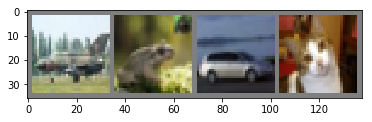

plane	 frog	  car	  cat	


In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    img = img/2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

detaiter = iter(trainloader)
images,labels = detaiter.next()
imshow(torchvision.utils.make_grid(images))
print(''.join('%5s\t' % classes[labels[j]] for j in range(4)))

In [86]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64,128,3)
        self.fc1 = nn.Linear(128 * 2 * 2, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net  = Net()
print(net)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [87]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [88]:
for epoch in range(2):
    
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss +=loss.item()
        if i%2000 == 1999:
            print('[%d,%5d] loss:%.3f'%(epoch+1,i+1,running_loss/2000))
            running_loss = 0.0
            
print("Finished Trainning")

[1, 2000] loss:2.292
[1, 4000] loss:2.001
[1, 6000] loss:1.721
[1, 8000] loss:1.611
[1,10000] loss:1.506
[1,12000] loss:1.427
[2, 2000] loss:1.317
[2, 4000] loss:1.293
[2, 6000] loss:1.257
[2, 8000] loss:1.205
[2,10000] loss:1.161
[2,12000] loss:1.130
Finished Trainning


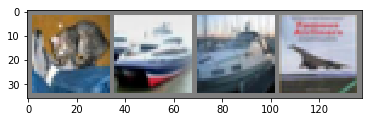

GroundTruth:    cat  ship  ship plane


In [89]:
dataiter  = iter(testloader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [90]:
outputs = net(images)
_,predicted = torch.max(outputs,1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [91]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


In [92]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 62 %
Accuracy of   car : 75 %
Accuracy of  bird : 36 %
Accuracy of   cat : 56 %
Accuracy of  deer : 60 %
Accuracy of   dog : 54 %
Accuracy of  frog : 60 %
Accuracy of horse : 55 %
Accuracy of  ship : 80 %
Accuracy of truck : 69 %


### transform it to gpu

In [49]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [50]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [51]:
inputs,labels = inputs.to(device),labels.to(device)